# Linear Discriminant Analysis

Assim como o PCA, o LDA e uma tecnica de transformacao linear que tambem pode ser utilizado para reducao de dimensionalidade, com a diferenca que o LDA e supervisionado, enquanto o PCA e nao supervisionado.

O PCA tenta sumarizar o conjunto de caracteristicas se orientando pela direcao das maiores variancias. Em datasets grandes, muitas caracteristicas podem ser redundantes e correlatas, cuja remocao geralmente nao causa grande impacto no dataset para maioria das tarefas.

Ja o LDA tenta reduzir a dimensionalidade dos dados retendo informacoes capazes de discriminar a classe a ser predita. O LDA tenta encontrar a reta (hyperplano) entre os agrupamentos de cada classe. Sendo assim, ele tenta projetar as amostras em um espaco dimensional onde esses agrupamentos sao o mais bem separaveis possivel, e os cada elemento esteja o mais proximo possivel do centro do agrupamento. As novas dimensoes sao rankeadas de acordo com suas capacidades de maximizar a distancia entre os agrupamentos e minimizar a distancia entre os pontos dentro de um agrupamento e seu centro. Essas dimensoes formam os discriminantes lineares do conjunto de caracteristicas.



## Implementando LDA com o Scikit learn:

Vamos utilizar o dataset Iris, muito famoso para problemas de classificacao. Informacoes sobre o dataset podem ser encontradas no link a seguir:
https://archive.ics.uci.edu/ml/datasets/iris

## Importando pacotes e o dataset

In [1]:
import numpy as np
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

## Processamento dos dados

Uma vez que o dataset esteja carregado em um dataframe pandas, o primeiro passo e separar o vetor de caracteristicas e os rotulos correspontes, e em seguida dividi-lo em treinamento e teste:

In [2]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
list(set(y.tolist()))

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

## Normalizacao dos dados

Assim como a maioria dos algoritmos de ML, o LDA tambem requer (ou pelo menos funciona melhor) com dados normalizados.

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Executando o LDA

Sao necessarias apenas poucas linhas para executarmos o LDA, utilizando a classe `LinearDiscriminantAnalysis`.

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

No codigo acima, importamos o LDA passando como parametro o numero de componentes que desejamos extrair, nesse caso 1. Na sequencia, executamos a funcao `fit_transform` para treinar e converter os dados de treinamento, e `transform` para converter os dados de teste considerando o modelo ja treinado.

Note que, por ser um algoritmo supervisionado, o LDA requer como parametro os rotulos (y_train) para treinamento, diferente do PCA que e nao supervisionado.

## Treinando um classificador para predicoes

Uma vez que gostariamos de comparar a performance do LDA com o PCA, podemos considerar uma tarefa de classificacao utilizando, por exemplo, o classificador Random Forest:

In [5]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## Avaliando a performance

Como de costume, o ultimo passo e avaliar a performance do algoritmo utilizando alguma metrica, como por exemplo matriz de confusao, para verificarmos o quao bem o modelo foi na tarefa:

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Acuracia ' + str(accuracy_score(y_test, y_pred)))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Acuracia 1.0


Podemos ver que mesmo com um unico componente, o algoritmo foi capaz de obter uma acuracia de 100%.

## PCA vs LDA: qual escolher para tarefa de reducao de dimensionalidade?

Para casos em que os dados sao distribuidos de maneira uniforme, LDA quase sempre se sai melhor que o PCA. No entando, para dados muito irregulares, PCA pode se dar maior, uma vez que LDA pode tender para classes majoritarias.

Por fim, PCA tem a vantagem de poder ser aplicado em datasets rotulados e nao rotulados, enquanto LDA necessita dos rotulos para guiar o aprendizado.

# Exercicios

1. Execute o PCA no exemplo acima, usando o dataset Iris e Random Forest, e compare o resultado com o LDA.

2. Comparar o LDA com o PCA para reducao de caracteristicas utilizando o dataset faces. Como classificador, compare os resultados do SVM e do Random Forest.

3. LDA tambem pode ser usado como um algoritmo de classificacao, em que ele proprio encontra o hyperplano que melhor separa os dados. Compara o LDA na tarefa de classificacao com os resultados do exercicion numero 2.

### Resolução exercícios


#### 1. Execute o PCA no exemplo acima, usando o dataset Iris e Random Forest, e compare o resultado com o LDA.

IMPORTANDO PACOTES E DATASET

In [7]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

SEPARANDO O DATASET EM TREINO E TESTE

In [9]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

VERIFICANDO O NÚMERO DE COMPONENTES QUE SERIA IDEAL, FOI USADO 1 COMPONENTE POIS TEM QUE SER IGUAL AO LDA PARA COMPARAÇÃO

In [10]:
# testando usar a porcentagem da variância para saber o numero de componentes necessários
#pca = PCA(.95).fit(X_train)
#pca.n_components_

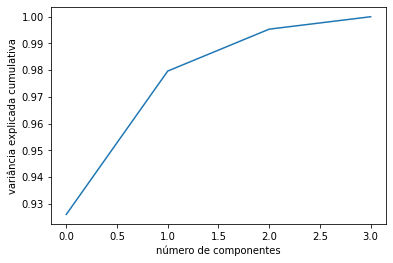

In [11]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('variância explicada cumulativa');

INSTANCIANDO PCA COM 1 COMPONENTE E TRANSFORMANDO DADOS

In [12]:
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

VERIFICANDO TAMANHO DOS DADOS APÓS TRANSFORMADOS

In [13]:
print("original shape:   ", X.shape)
print("transformed shape:", X_train.shape)

original shape:    (150, 4)
transformed shape: (120, 1)


TREINANDO O CLASSIFICADOR

In [14]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

VERIFICANDO RESULTADOS

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Acuracia ' + str(accuracy_score(y_test, y_pred)))

[[11  0  0]
 [ 0 12  1]
 [ 0  2  4]]
Acuracia 0.9


O LDA POSSUI MAIOR ACURÁCIA QUE O PCA, NESTE CASO.


#### 2. Comparar o LDA com o PCA para reducao de caracteristicas utilizando o dataset faces. Como classificador, compare os resultados do SVM e do Random Forest.

IMPORTANDO DATASET

In [16]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


SVM E PCA

In [17]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import seaborn as sns; sns.set()
from sklearn.metrics import accuracy_score

In [18]:
# Usando 95%  da variância para saber o numero de componentes necessários
pca = PCA(.95).fit(faces.data)
pca.n_components_

160

In [19]:
pca = PCA(n_components=160, whiten=True, random_state=42)
svc = SVC(class_weight='balanced')
model = make_pipeline(pca, svc)


In [20]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'svc__C': [0.01, 0.5, 1, 5, 10, 50],
    'svc__kernel': ['poly', 'rbf', 'sigmoid'],
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05],
    'svc__decision_function_shape':  ['ovo', 'ovr']
}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 25min 5s, sys: 51.6 s, total: 25min 56s
Wall time: 4min 19s
{'svc__C': 5, 'svc__decision_function_shape': 'ovo', 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [22]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

In [23]:
print('Acuracia ' + str(accuracy_score(ytest, yfit)))

Acuracia 0.8545994065281899


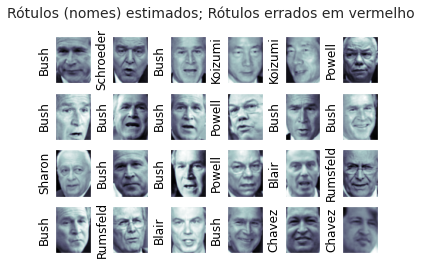

In [24]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Rótulos (nomes) estimados; Rótulos errados em vermelho', size=14);

In [25]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.72      0.87      0.79        15
     Colin Powell       0.85      0.90      0.87        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.95      0.84      0.89       126
Gerhard Schroeder       0.68      0.83      0.75        23
      Hugo Chavez       0.88      0.70      0.78        20
Junichiro Koizumi       0.80      1.00      0.89        12
       Tony Blair       0.88      0.88      0.88        42

         accuracy                           0.85       337
        macro avg       0.81      0.86      0.83       337
     weighted avg       0.86      0.85      0.86       337



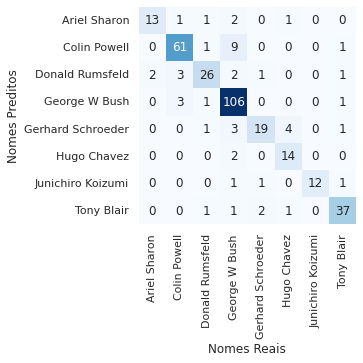

In [26]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names,cmap=plt.cm.Blues)
plt.xlabel('Nomes Reais')
plt.ylabel('Nomes Preditos');

RANDOM FOREST E PCA

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, 
                                                    test_size=0.2, random_state=0)

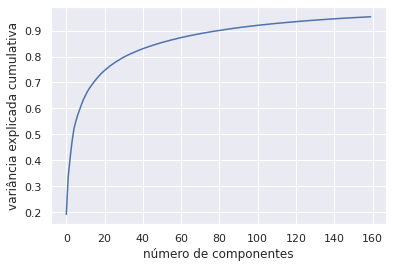

In [28]:
pca = PCA(160).fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('variância explicada cumulativa');

In [29]:
pca = PCA(n_components=160)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [30]:
print("Tamanho Original:   ", faces.data.shape)
print("Tamanho(com separação treino e teste) transformado pelo pca:", X_train.shape)

Tamanho Original:    (1348, 2914)
Tamanho(com separação treino e teste) transformado pelo pca: (1078, 160)


In [31]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Acuracia ' + str(accuracy_score(y_test, y_pred)))


Acuracia 0.48518518518518516


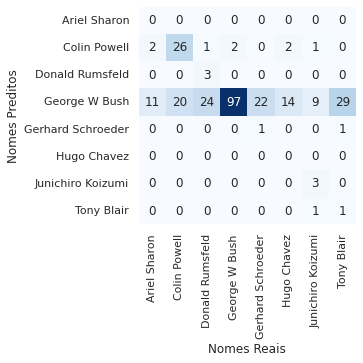

In [33]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names,cmap=plt.cm.Blues)
plt.xlabel('Nomes Reais')
plt.ylabel('Nomes Preditos');

SVM E LDA

Separando dataset em treino e teste

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, 
                                                    test_size=0.2, random_state=0)

Normalizando

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(1078, 2914)
(270, 2914)


Treinando e transformando dataset 


In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [37]:
svc = SVC(class_weight='balanced')
model = make_pipeline(lda, svc)

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'svc__C': [0.01, 0.5, 1, 5, 10, 50],
    'svc__kernel': ['poly', 'rbf', 'sigmoid'],
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05],
    'svc__decision_function_shape':  ['ovo', 'ovr']
}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 5min 5s, sys: 12.4 s, total: 5min 17s
Wall time: 52.9 s
{'svc__C': 0.5, 'svc__decision_function_shape': 'ovo', 'svc__gamma': 0.0005, 'svc__kernel': 'rbf'}


In [39]:
model = grid.best_estimator_
y_pred = model.predict(X_test)

In [40]:
print('Acuracia ' + str(accuracy_score(y_test, y_pred)))

Acuracia 0.6814814814814815


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.56      0.38      0.45        13
     Colin Powell       0.63      0.70      0.66        46
  Donald Rumsfeld       0.65      0.71      0.68        28
    George W Bush       0.76      0.75      0.76        99
Gerhard Schroeder       0.59      0.57      0.58        23
      Hugo Chavez       0.80      0.75      0.77        16
Junichiro Koizumi       0.71      0.71      0.71        14
       Tony Blair       0.58      0.58      0.58        31

         accuracy                           0.68       270
        macro avg       0.66      0.64      0.65       270
     weighted avg       0.68      0.68      0.68       270



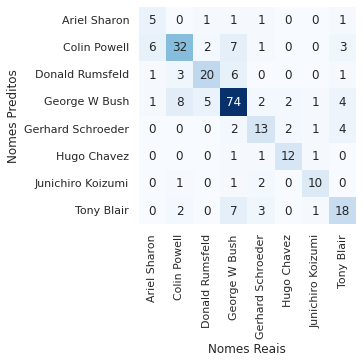

In [42]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names,cmap=plt.cm.Blues)
plt.xlabel('Nomes Reais')
plt.ylabel('Nomes Preditos');

RANDOM FOREST E LDA


In [43]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [44]:
print('Acuracia ' + str(accuracy_score(y_test, y_pred)))

Acuracia 0.6444444444444445


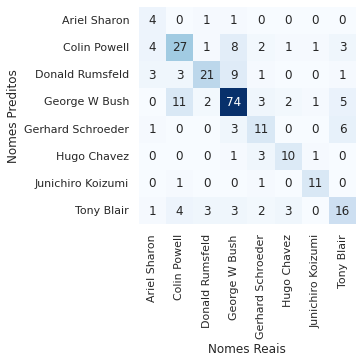

In [45]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names,cmap=plt.cm.Blues)
plt.xlabel('Nomes Reais')
plt.ylabel('Nomes Preditos');

#### 3. LDA tambem pode ser usado como um algoritmo de classificacao, em que ele proprio encontra o hyperplano que melhor separa os dados. Compara o LDA na tarefa de classificacao com os resultados do exercicion numero 2.

In [46]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, 
                                                    test_size=0.2, random_state=0)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda_fit = lda.fit(Xtrain, ytrain)
y_lda = lda.predict(Xtest)

In [49]:
print('Acuracia ' + str(accuracy_score(y_test, y_lda)))

Acuracia 0.6851851851851852
